# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

# 1. Load Data
Loading and immediately shuffeling Data frame.

In [48]:
# Prediction Model developed by:
# Khurram Nazir
#  
#
import pandas as pd
import numpy as np
import seaborn as sns
#

import io
from google.colab import files

uploaded_file = files.upload()
#df = pd.read_csv("C:/Users\khurr/Documents/GitHub/AI-Engineering/PIAIC/Car_Price_Prediction_Assignment/CarPrice_Assignment.csv",sep=',')
df = pd.DataFrame(pd.read_csv(io.BytesIO(uploaded_file['CarPrice_Assignment.csv']),sep=','))

Saving CarPrice_Assignment.csv to CarPrice_Assignment (3).csv


In [49]:

df = df.sample(frac=1) #Shuffeling DF.
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
23,24,1,dodge d200,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,mpfi,3.03,3.390,7.6,102,5500,24,30,7957.0
89,90,1,Nissan versa,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1889,ohc,four,97,2bbl,3.15,3.290,9.4,69,5200,31,37,5499.0
193,194,0,volkswagen dasher,gas,std,four,wagon,fwd,front,100.4,183.1,66.9,55.1,2563,ohc,four,109,mpfi,3.19,3.400,9.0,88,5500,25,31,12290.0
98,99,2,nissan clipper,gas,std,two,hardtop,fwd,front,95.1,162.4,63.8,53.3,2008,ohc,four,97,2bbl,3.15,3.290,9.4,69,5200,31,37,8249.0
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.150,9.5,114,5400,23,28,13415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285,l,four,120,mpfi,3.46,2.190,8.4,95,5000,19,24,16695.0
192,193,0,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2579,ohc,four,97,idi,3.01,3.400,23.0,68,4500,33,38,13845.0
56,57,3,mazda glc,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0
101,102,0,nissan dayz,gas,std,four,sedan,fwd,front,100.4,181.7,66.5,55.1,3095,ohcv,six,181,mpfi,3.43,3.270,9.0,152,5200,17,22,13499.0


In [50]:
def df_lookslike(v_df):
    #---------------------------------------How dataframe looks like?
    v_df.info()
    print(v_df.head(5))
    total_cells=np.product(v_df.shape)
    num_col = [i for i in v_df.columns if (v_df[i].dtype=='int64' or v_df[i].dtype=='float64')]
    print(v_df[num_col].describe().loc[['min','max', 'mean','50%'],:]) #How big is Messy data?
    missing_Values=v_df.isnull().sum()
    print(missing_Values)
    total_missing=missing_Values.sum()

    #Percent of Missing data
    print("Percent of data is missing:",((total_missing/total_cells) * 100))

# 2. Check Missing Values
( If Exist ; Fill each record with mean of its feature )

I found there is NO missing/NULL data.

In [51]:
df_lookslike(df)# How DF looks like?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 23 to 152
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 

# Preparing Tensor / Vectorization

In [52]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()


#Encoding scheme HotEncoding by using SKlearn. Let's seee further Heatmap to drop unneeded columns.
df['CarName']=label_enc.fit_transform(df['CarName'])
df['fueltype']=label_enc.fit_transform(df['fueltype'])
df['aspiration']=label_enc.fit_transform(df['aspiration']) 
df['doornumber']=label_enc.fit_transform(df['doornumber'])
df['carbody']=label_enc.fit_transform(df['carbody'])
df['drivewheel']=label_enc.fit_transform(df['drivewheel'])
df['enginelocation']=label_enc.fit_transform(df['enginelocation'])
df['enginetype']=label_enc.fit_transform(df['enginetype'])
df['cylindernumber']=label_enc.fit_transform(df['cylindernumber'])
df['fuelsystem']=label_enc.fit_transform(df['fuelsystem'])




print(df.head(5))


     car_ID  symboling  CarName  ...  citympg  highwaympg    price
23       24          1       32  ...       24          30   7957.0
89       90          1        0  ...       31          37   5499.0
193     194          0      132  ...       25          31  12290.0
98       99          2       70  ...       31          37   8249.0
195     196         -1      138  ...       23          28  13415.0

[5 rows x 26 columns]


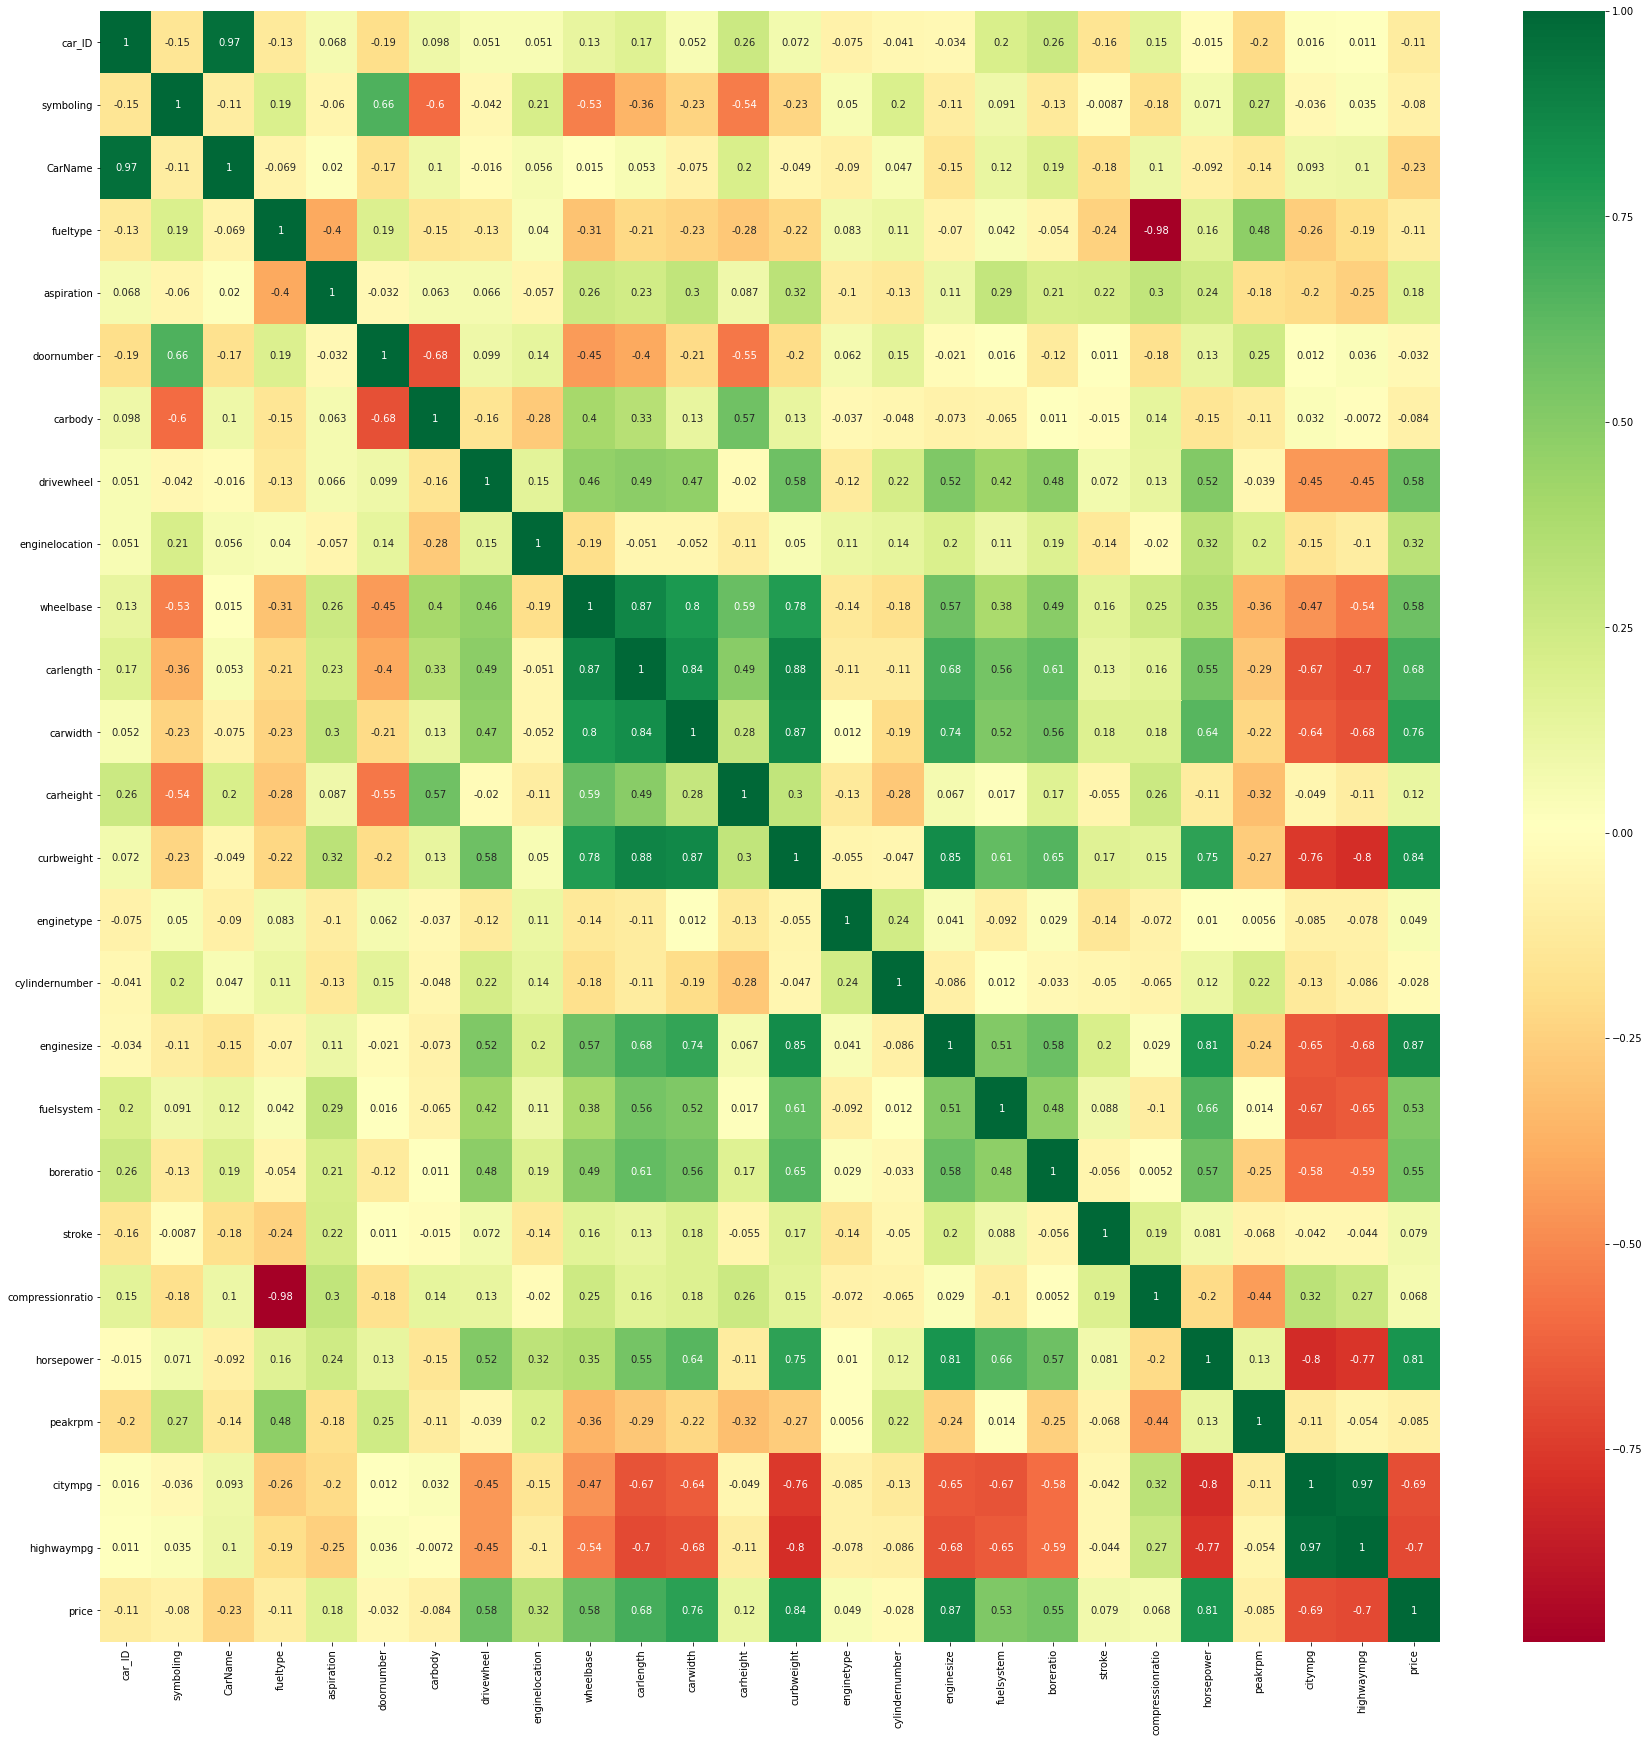

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df.corr(method='pearson',min_periods=5) #pearson : standard correlation coefficient,
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [54]:
#I'm going to drop the Indirect variable which has -ve correlation/association with Price.
df.drop(columns=['highwaympg','citympg','car_ID','CarName','symboling','enginelocation'], inplace=True)
df.head(10)

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price
23,1,1,1,2,1,93.7,157.3,63.8,50.8,2128,3,2,98,5,3.03,3.39,7.6,102,5500,7957.0
89,1,0,1,3,1,94.5,165.3,63.8,54.5,1889,3,2,97,1,3.15,3.29,9.4,69,5200,5499.0
193,1,0,0,4,1,100.4,183.1,66.9,55.1,2563,3,2,109,5,3.19,3.40,9.0,88,5500,12290.0
98,1,0,1,1,1,95.1,162.4,63.8,53.3,2008,3,2,97,1,3.15,3.29,9.4,69,5200,8249.0
195,1,0,0,4,2,104.3,188.8,67.2,57.5,3034,3,2,141,5,3.78,3.15,9.5,114,5400,13415.0
52,1,0,1,2,1,93.1,159.1,64.2,54.1,1905,3,2,91,1,3.03,3.15,9.0,68,5000,6795.0
53,1,0,0,3,1,93.1,166.8,64.2,54.1,1945,3,2,91,1,3.03,3.15,9.0,68,5000,6695.0
110,0,1,0,4,2,114.2,198.9,68.4,58.7,3430,2,2,152,3,3.70,3.52,21.0,95,4150,13860.0
138,1,0,1,2,1,93.7,156.9,63.4,53.7,2050,4,2,97,1,3.62,2.36,9.0,69,4900,5118.0
4,1,0,0,3,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,17450.0


# 3. Split Data.

50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).


In [55]:
from sklearn.model_selection import train_test_split

Y=(df.loc[:,df.columns=='price']) #Lets take Dependent Variable/Target in a serpate df i.e X.
X=(df.loc[:,df.columns!='price']) #Lets take Independent Variables in a serpate df i.e Y.


x_train_50,X_remaining,y_train_50,Y_remaining=train_test_split(X,Y,test_size=0.5,random_state=0)
x_test_30,x_valid_20,y_test_30,y_valid_20=train_test_split(X_remaining,Y_remaining,test_size=0.7,random_state=0)

print("Training Data-X [50%]:\t", x_train_50.shape)
print("Test Data-X [30%]:\t", x_test_30.shape)
print("Validate Data-X [20%]:\t", x_valid_20.shape)

Training Data-X [50%]:	 (102, 19)
Test Data-X [30%]:	 (30, 19)
Validate Data-X [20%]:	 (73, 19)


# 4. Data Normalization


In [56]:
#I am doing the normlization after data submit (I posted the question over slack).

#Please confirm when to Normalize data? Some people says to Normalized after splitting someone told to do Normalization before splitting.
#Picture data Normalization:			Divided by Higher pixel value (for colored pic 255) 
#Discrete/number data Normalization:	mean and std


#Training data normalization
mean = x_train_50.iloc[: , 0:14].mean(axis=0)
x_train_50.iloc[: , 0:14] -= mean
std = x_train_50.iloc[:, 0:14].std(axis=0)
x_train_50.iloc[: , 0:14] /= std
x_train_50



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm
98,0.345968,-0.429212,1.189355,-1.944849,-0.532847,-0.609768,-1.031727,-1.011724,-0.172697,-1.020055,-0.132684,-0.131612,-0.705999,-0.993904,3.15,3.29,9.40,69,5200
153,0.345968,-0.429212,-0.832549,1.618767,-0.532847,-0.501033,-0.381461,-1.105838,2.112927,-0.492397,-0.132684,-0.131612,-0.826059,-0.993904,3.05,3.03,9.00,62,4800
120,0.345968,-0.429212,-0.832549,-0.756977,-0.532847,-0.863482,-1.486022,-1.011724,-1.236694,-1.099591,-0.132684,-0.131612,-0.874083,-0.993904,2.97,3.23,9.40,68,5500
143,0.345968,-0.429212,-0.832549,0.430895,-0.532847,-0.229196,-0.176583,-0.258813,-0.487955,-0.376002,0.834015,-0.131612,-0.441867,0.984208,3.62,2.64,9.00,94,5200
69,-2.862101,2.307012,1.189355,-1.944849,1.341305,1.492439,1.204118,2.046976,0.457820,1.864604,-0.132684,-1.352011,1.359030,-0.004848,3.58,3.64,21.50,123,4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.345968,-0.429212,1.189355,-3.132721,1.341305,-0.337931,0.562760,2.141090,-1.157880,2.233189,1.800713,-2.572410,2.583640,0.984208,3.46,3.10,8.30,155,4750
79,0.345968,2.307012,1.189355,-0.756977,-0.532847,-0.990340,-1.486022,-1.011724,-1.157880,-0.754286,-0.132684,-0.131612,-0.681987,1.478735,3.03,3.39,7.60,102,5500
163,0.345968,-0.429212,1.189355,0.430895,1.341305,-0.718503,-0.470539,-0.917610,-0.448548,-0.707728,-0.132684,-0.131612,-0.681987,-0.993904,3.19,3.03,9.00,70,4800
132,0.345968,-0.429212,1.189355,-0.756977,-0.532847,0.115131,1.123948,0.258813,0.930708,0.240892,-0.132684,-0.131612,-0.129712,0.984208,3.54,3.07,9.31,110,5250


In [57]:
#Validation data normalization
val_mean = x_valid_20.iloc[:, 0:14].mean(axis=0)
val_std = x_valid_20.iloc[:, 0:14].std(axis=0)
x_valid_20.iloc[:, 0:14] -= val_mean
x_valid_20.iloc[:, 0:14] /= val_std
x_valid_20

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm
44,0.269299,-0.462275,1.006826,0.450997,-0.607602,-0.711684,-1.348227,-1.081099,-0.751465,-1.280227,0.012054,-0.110389,-0.840921,-1.293941,3.03,3.11,9.6,70,5400
51,0.269299,-0.462275,1.006826,-0.611028,-0.607602,-0.925356,-1.114084,-0.814477,0.145728,-1.232939,0.012054,-0.110389,-0.819130,-1.293941,3.03,3.15,9.0,68,5000
52,0.269299,-0.462275,1.006826,-0.611028,-0.607602,-0.925356,-1.114084,-0.814477,0.145728,-1.223845,0.012054,-0.110389,-0.819130,-1.293941,3.03,3.15,9.0,68,5000
25,0.269299,-0.462275,-0.979615,0.450997,-0.607602,-0.833782,-1.245789,-0.992225,-1.349594,-1.071067,0.012054,-0.110389,-0.840921,-1.293941,2.97,3.23,9.4,68,5500
64,0.269299,-0.462275,-0.979615,-0.611028,-0.607602,-0.055404,0.254190,0.207576,0.743857,-0.278075,0.012054,-0.110389,-0.143586,-1.293941,3.39,3.39,8.6,84,4800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.269299,-0.462275,1.006826,-0.611028,-2.313562,-0.894831,-1.245789,-0.992225,0.829304,-0.614551,0.892002,-0.110389,-0.448670,-1.293941,3.62,2.64,8.7,73,4400
74,0.269299,-0.462275,1.006826,-1.673053,1.098358,1.959221,1.820021,2.651614,0.701133,2.068161,1.771949,-2.412792,3.822505,0.770708,3.80,3.35,8.0,184,4500
15,0.269299,-0.462275,-0.979615,0.450997,1.098358,0.661924,1.073690,0.385324,0.829304,1.186049,0.012054,1.040812,1.752292,0.770708,3.62,3.39,8.0,182,5400
133,0.269299,-0.462275,-0.979615,0.450997,-0.607602,-0.009617,0.898083,0.207576,1.000198,0.212997,0.012054,-0.110389,-0.165378,0.770708,3.54,3.07,9.3,110,5250


In [58]:
#Test data normalization
test_mean = x_test_30.iloc[:, 0:14].mean(axis=0)
test_std =  x_test_30.iloc[:, 0:14].std(axis=0)
x_test_30.iloc[:, 0:14] -= test_mean
x_test_30.iloc[:, 0:14] /= test_std
x_test_30

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm
30,0.385640,-0.592887,1.204159,-0.881594,-0.710175,-1.882201,-2.240087,-0.798411,-1.146323,-1.806412,0.394859,-0.413023,-1.074861,-1.628183,2.91,3.41,9.6,58,4800
108,-2.506658,1.630440,-0.802773,0.510397,1.065262,1.414746,1.011528,1.504697,1.272023,1.302865,-0.789719,-0.413023,0.907465,-0.219179,3.70,3.52,21.0,95,4150
118,0.385640,-0.592887,1.204159,-0.881594,-0.710175,-0.783218,-1.259196,-0.849591,-1.146323,-1.376896,0.394859,-0.413023,-1.140939,-1.158515,2.97,3.23,9.4,68,5500
107,0.385640,-0.592887,-0.802773,0.510397,1.065262,1.414746,1.011528,1.504697,1.272023,0.932015,-0.789719,-0.413023,-0.149776,0.720158,3.46,3.19,8.4,97,5000
180,0.385640,-0.592887,-0.802773,0.510397,1.065262,0.888473,1.096487,0.532274,0.206311,1.164582,-3.158876,1.652093,1.535202,0.720158,3.27,3.35,9.2,156,5200
119,0.385640,1.630440,1.204159,-0.881594,-0.710175,-0.783218,-1.259196,-0.849591,-1.146323,-0.936904,0.394859,-0.413023,-0.876629,1.189826,3.03,3.39,7.6,102,5500
29,0.385640,1.630440,1.204159,-0.881594,-0.710175,-0.442689,-0.031152,0.429913,-1.392257,0.494118,0.394859,-0.413023,1.039620,0.250490,3.60,3.90,7.0,145,5000
126,0.385640,-0.592887,1.204159,-2.273585,1.065262,-1.433321,-0.363264,-0.235429,-0.818412,0.378882,1.579438,1.652093,2.295094,0.720158,3.74,2.90,9.5,207,5900
46,0.385640,-0.592887,1.204159,-0.881594,1.065262,-0.427210,-0.077493,-0.133068,-0.900390,0.332788,0.394859,-0.413023,-0.182815,1.659494,3.43,3.23,9.2,90,5000
161,0.385640,-0.592887,-0.802773,-0.881594,-0.710175,-0.473646,-0.564077,-0.542510,-0.326545,-0.949475,0.394859,-0.413023,-0.876629,-1.158515,3.19,3.03,9.0,70,4800


# 4. Model :

Input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

network = Sequential()

network.add(layers.Dense(10, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(x_train_50.shape[1],)))
network.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
network.add(layers.Dense(1))

# 5.Compilation
Steps(Note : Its a Regression problem , select loss , metrics according to it)


In [60]:


network.compile(optimizer='rmsprop', loss='mse', metrics='mae')

history = network.fit(x_train_50,y_train_50, batch_size=16, verbose=0, epochs=200, validation_data=(x_valid_20, y_valid_20))

# 6.Train Model
with Epochs (100) and validate it



In [61]:
epochs = range(1, 201)
train_mae = history.history['mae']
val_mae = history.history['val_mae']

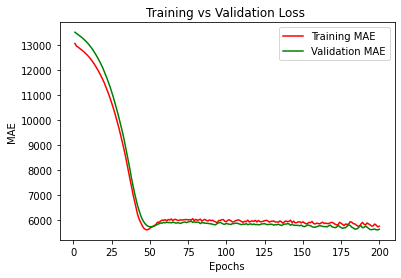

In [62]:
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Validation MAE')
plt.title('Training vs Validation Loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [63]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

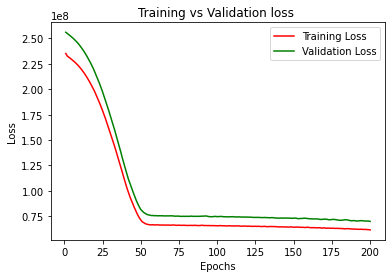

In [64]:
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training vs Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
print('Predicted Price:\n',network.predict(x_test_30))

Predicted Price:
 [[11529.939 ]
 [10749.951 ]
 [13268.26  ]
 [12576.389 ]
 [13619.988 ]
 [13648.024 ]
 [12992.1875]
 [15704.84  ]
 [12461.976 ]
 [11712.851 ]
 [11704.723 ]
 [14161.851 ]
 [12605.506 ]
 [13668.564 ]
 [14308.022 ]
 [11022.587 ]
 [13006.714 ]
 [13563.274 ]
 [12578.508 ]
 [11625.378 ]
 [12269.838 ]
 [13707.943 ]
 [13823.866 ]
 [12368.847 ]
 [12106.662 ]
 [10751.359 ]
 [11068.786 ]
 [10574.054 ]
 [11065.345 ]
 [11712.519 ]]


# 8.Evaluation Step

In [66]:
test_mse_score, test_mae_score  =network.evaluate(x_test_30, y_test_30)



1/1 [==============================] - 0s 20ms/step - loss: 34216456.0000 - mae: 4682.0576
